# Exercise Decision Tree Classifier 🌳🌳
## Importing libraries and dataset

0. Import usual libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay, classification_report

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE

1. Import the bl.txt dataset and display the first few lines.

In [2]:
dataset = pd.read_csv("src/bl.txt")

In [3]:
dataset.head()

balance  left_weight  left_distance  right_weight  right_distance
0       B            1              1             1               1
1       R            1              1             1               2
2       R            1              1             1               3
3       R            1              1             1               4
4       R            1              1             1               5

2. Display a descriptive statistic table

In [4]:
dataset.describe(include = 'all')

balance  left_weight  left_distance  right_weight  right_distance
count      625   625.000000     625.000000    625.000000      625.000000
unique       3          NaN            NaN           NaN             NaN
top          R          NaN            NaN           NaN             NaN
freq       288          NaN            NaN           NaN             NaN
mean       NaN     3.000000       3.000000      3.000000        3.000000
std        NaN     1.415346       1.415346      1.415346        1.415346
min        NaN     1.000000       1.000000      1.000000        1.000000
25%        NaN     2.000000       2.000000      2.000000        2.000000
50%        NaN     3.000000       3.000000      3.000000        3.000000
75%        NaN     4.000000       4.000000      4.000000        4.000000
max        NaN     5.000000       5.000000      5.000000        5.000000

In [5]:
dataset['balance'].value_counts()

R    288
L    288
B     49
Name: balance, dtype: int64

3. What is the dataset shape?

In [6]:
dataset.shape

(625, 5)

## Preprocessing

4. Separate the target variable "balance" into a Y object and the explanatory variables into a X object.

In [7]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "balance"

X = dataset.drop(target_variable, axis = 1)
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    B
1    R
2    R
3    R
4    R
Name: balance, dtype: object

X :
   left_weight  left_distance  right_weight  right_distance
0            1              1             1               1
1            1              1             1               2
2            1              1             1               3
3            1              1             1               4
4            1              1             1               5


5. Split the data between a train set with 70% of the data and use the rest to build a test set with random_state=42

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42, stratify = Y)

## Comparing Decision Trees: Gini or Entropy Criterion?

6. Create an instance of a 'DecisionTreeClassifier' with GINI criterion, and fit it on training data. Beforehand, make any preprocessing that you think is necessary.

In [9]:
### Preprocessings ###
# With a decision tree, there's no need to normalize the numerical variables !

# Encode label
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.transform(Y_test)

In [10]:
classifier_gini = DecisionTreeClassifier(criterion="gini")
classifier_gini.fit(X_train, Y_train)

DecisionTreeClassifier()

7. Display your tree using `plot_tree` from [sklearn.tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

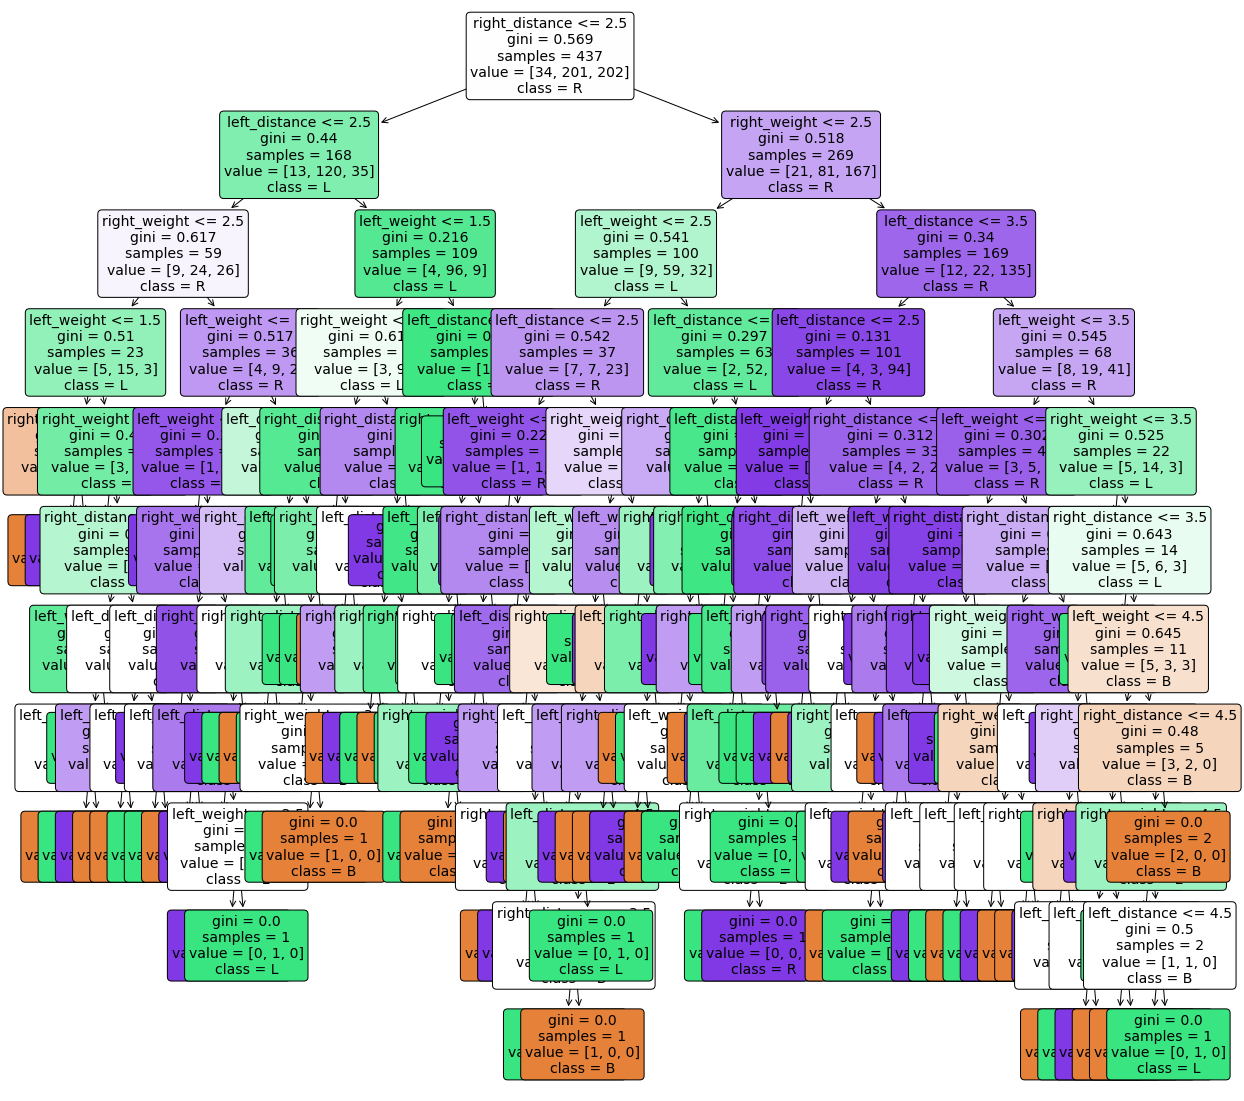

In [11]:
from sklearn.tree import plot_tree

class_names = encoder.inverse_transform([0, 1, 2])

plt.figure(figsize=(20,20))
a = plot_tree(classifier_gini, 
              feature_names=X.columns, 
              class_names=class_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)

8. Create an instance of a DecisionTreeClassifier using the entropy criterion.

In [12]:
classifier_entropy = DecisionTreeClassifier(criterion="entropy")
classifier_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

9. Display the tree

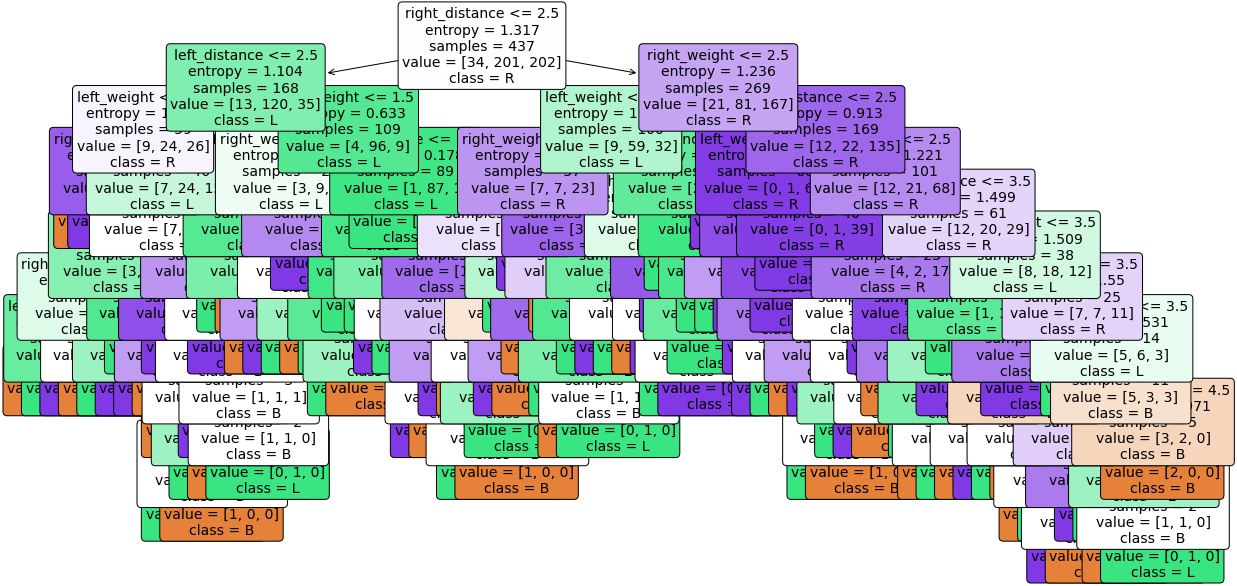

In [13]:
plt.figure(figsize=(20,10))
a = plot_tree(classifier_entropy, 
              feature_names=X.columns, 
              class_names=class_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)

10. Check if the observation defined as X_new  [4, 4, 3, 3] is classified as left

In [15]:
X_new = pd.DataFrame(data = [[4,4,3,3]], columns = ["left_weight", "left_distance", "right_weight", "right_distance"])
classifier_entropy.predict(X_new)

array([1])

In [16]:
encoder.inverse_transform([1])

array(['L'], dtype=object)

In [17]:
classifier_gini.predict(X_new)

array([1])

11. Use the gini classifier to make predictions on the test set

In [18]:
y_pred_gini = classifier_gini.predict(X_test)
y_pred_gini

array([2, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 1, 1,
       2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1,
       2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 1,
       1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1,
       2, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2])

12. Use the entropy classifier on the test set to make predictions

In [19]:
y_pred_entropy = classifier_entropy.predict(X_test)
y_pred_entropy

array([2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2,
       1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1,
       1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 1,
       2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1,
       2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1,
       2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2])

12. Compare each prediction made with the gini and entropy classifier, what proportion of predictions are identical?

You can either compare each prediction using a for loop over all observations' indices, otherwise you simply loop over the two prediction vectors using the ```zip``` function
You can figure out what ```zip``` does by running
```
A=[1,2,3]
B=["a","b","c"]

for a, b in zip(A,B):
  print(a,b)
```

The numbers appearing in the solution will not necessarily the ones you will obtain depending on random operations you ran on your data.

In [20]:
A=[1,2,3]
B=["a","b","c"]

for a, b in zip(A,B):
    print(a,b)

1 a
2 b
3 c


In [21]:
count = 0

for i in range(0, len(y_pred_gini)):
  
  if y_pred_gini[i] != y_pred_entropy[i]:
    count+= 1

print("on the test set, there are {} examples that have different predictions from Gini and Entropy".format(count))
print("Which corresponds to a percentage of {}% ".format(np.round(count/len(y_pred_gini)*100, 3)))

on the test set, there are 24 examples that have different predictions from Gini and Entropy
Which corresponds to a percentage of 12.766% 


13. What's the accuracy of the gini classifier?

In [22]:
classifier_gini.score(X_test, Y_test)

0.7553191489361702

14. What's the accuracy of the entropy classifier? 

In [23]:
classifier_entropy.score(X_test, Y_test)

0.7287234042553191

15. Display the "entropy" model's confusion matrix, what do you notice?

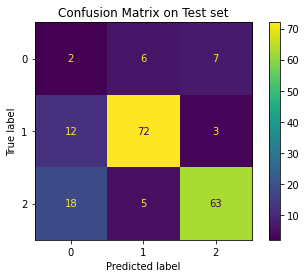

In [24]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier_entropy, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()



**--> Most errors correspond to examples of class 'B' that are misclassified as 'R' or 'L'**

16. Display the classification report for both models on both training and testing data. Do the models perform well? Do they overfit ?

*Hint : have a look at scikit-learn's documentation about available metric functions* 😉

In [25]:
print(classification_report(y_true = Y_test, y_pred=classifier_entropy.predict(X_test)))

              precision    recall  f1-score   support

           0       0.06      0.13      0.09        15
           1       0.87      0.83      0.85        87
           2       0.86      0.73      0.79        86

    accuracy                           0.73       188
   macro avg       0.60      0.56      0.57       188
weighted avg       0.80      0.73      0.76       188



In [26]:
print(classification_report(y_true = Y_train, y_pred = classifier_entropy.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       202

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437



In [27]:
print(classification_report(y_true = Y_test, y_pred = classifier_gini.predict(X_test)))

              precision    recall  f1-score   support

           0       0.04      0.07      0.05        15
           1       0.86      0.84      0.85        87
           2       0.89      0.79      0.84        86

    accuracy                           0.76       188
   macro avg       0.60      0.57      0.58       188
weighted avg       0.81      0.76      0.78       188



In [28]:
print(classification_report(y_true = Y_train, y_pred = classifier_gini.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       202

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437



**Actually, both models are overfitting !**

## Fighting overfitting

17. How would you fight overfitting while still using decision tree classifiers? Try to find the set of hyper parameters that maximizes the performances of the model on the test set. Did the model perform better ? Are there still ways to improve the model?

In [29]:
rtc = DecisionTreeClassifier()
params = {'max_depth' : np.arange(1,10),
         'min_samples_split' : [2, 5, 10, 20]}

grid =  GridSearchCV(estimator=rtc, param_grid= params, cv = 10)
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 5, 10, 20]})

In [30]:
print('Classification report on train set:')
print(classification_report(Y_train, grid.best_estimator_.predict(X_train)))

Classification report on train set:
              precision    recall  f1-score   support

           0       0.67      0.06      0.11        34
           1       0.87      0.89      0.88       201
           2       0.82      0.93      0.87       202

    accuracy                           0.84       437
   macro avg       0.79      0.63      0.62       437
weighted avg       0.83      0.84      0.82       437



In [31]:
print('Classification report on test set:')
print(classification_report(Y_test, grid.best_estimator_.predict(X_test)))

Classification report on test set:
              precision    recall  f1-score   support

           0       0.20      0.07      0.10        15
           1       0.80      0.83      0.81        87
           2       0.77      0.84      0.80        86

    accuracy                           0.77       188
   macro avg       0.59      0.58      0.57       188
weighted avg       0.74      0.77      0.75       188



**--> The overfitting has been reduced, now we could try advanced techniques to improve a bit the generalized scores.**

## Feature engineering

18. Try and create new variables in order to improve the model's performance. Make again the preprocessings. And train a new model with gini criterion.

In [32]:
dataset['left_prod'] = dataset['left_weight'] * dataset['left_distance']
dataset['right_prod'] = dataset['right_weight'] * dataset['right_distance']
dataset['balanced'] = dataset['right_prod'] - dataset['left_prod']

In [33]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "balance"

X = dataset.drop(target_variable, axis = 1)
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    B
1    R
2    R
3    R
4    R
Name: balance, dtype: object

X :
   left_weight  left_distance  right_weight  right_distance  left_prod  \
0            1              1             1               1          1   
1            1              1             1               2          1   
2            1              1             1               3          1   
3            1              1             1               4          1   
4            1              1             1               5          1   

   right_prod  balanced  
0           1         0  
1           2         1  
2           3         2  
3           4         3  
4           5         4  


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42, stratify = Y)

In [35]:
classifier_gini = DecisionTreeClassifier(criterion="gini")
classifier_gini.fit(X_train, Y_train)

DecisionTreeClassifier()

In [36]:
print(classification_report(Y_train, classifier_gini.predict(X_train)))
print(classification_report(Y_test, classifier_gini.predict(X_test)))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00        34
           L       1.00      1.00      1.00       201
           R       1.00      1.00      1.00       202

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437

              precision    recall  f1-score   support

           B       1.00      1.00      1.00        15
           L       1.00      1.00      1.00        87
           R       1.00      1.00      1.00        86

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



The conclusion to this exercise is that even though decision trees can be very high variance models able to model non-linear links between the target variable and the explanatory variables it still has very high constrains on how it can model the data.
It separates the explanatory variables space into "squares" that carry different predictions for the target variable. 